<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/EnsembleLearning/voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('/content/Iris.csv')

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.shape

(150, 6)

In [31]:
# removing Id col
df = df.iloc[:, 1:]

In [32]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# label encoding species
from sklearn.preprocessing import LabelEncoder

In [34]:
df['Species']  = LabelEncoder().fit_transform(df['Species'])

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


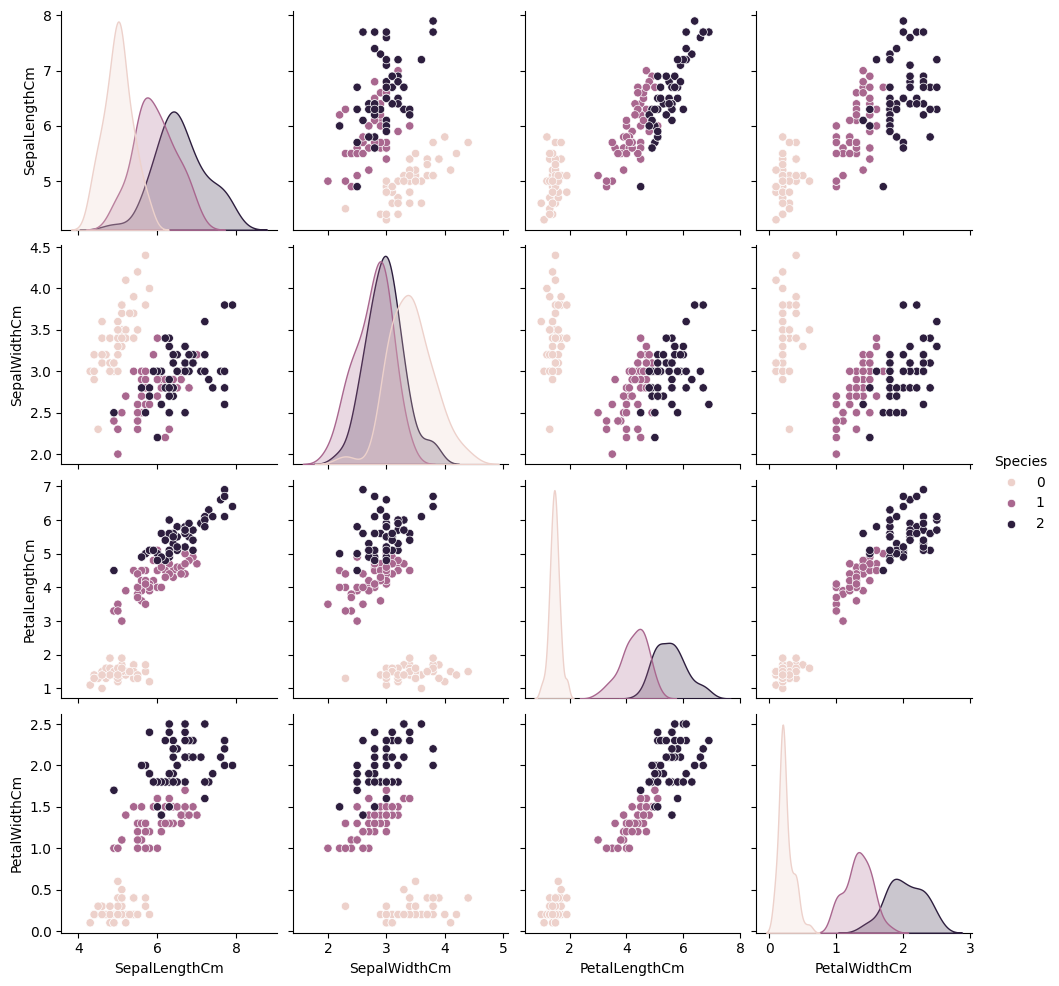

In [36]:
import seaborn as sns
sns.pairplot(df, hue='Species')

In [37]:
new_df = df[df['Species'] != 0][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [38]:
new_df

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [39]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [42]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [43]:
estimators = [('lr', clf1), ('rf', clf3), ('knn', clf2)]

In [44]:
for estimator in estimators:
  score = cross_val_score(estimator[1], x, y, cv=10, scoring='accuracy')
  print(estimator[0], np.round(np.mean(score), 2))

lr 0.81
rf 0.73
knn 0.76


In [45]:
from sklearn.ensemble import VotingClassifier

Hard Voting

In [46]:
vc = VotingClassifier(estimators=estimators)
score = cross_val_score(vc, x, y, cv=10, scoring='accuracy')
print(np.round(np.mean(score), 2))

0.77


Soft Voting

In [47]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')

score = cross_val_score(vc1, x, y, cv=10, scoring='accuracy')

print(np.round(np.mean(score), 2))

0.77


Weighted Voting

In [48]:
for i in range(1, 4):
  for j in range(1, 4):
    for k in range(1, 4):
      vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j, k])
      score = cross_val_score(vc, x, y, cv=10, scoring='accuracy')
      print("for i={}, j={}, k={}".format(i, j, k), np.round(np.mean(score), 2))

for i=1, j=1, k=1 0.76
for i=1, j=1, k=2 0.75
for i=1, j=1, k=3 0.75
for i=1, j=2, k=1 0.75
for i=1, j=2, k=2 0.75
for i=1, j=2, k=3 0.75
for i=1, j=3, k=1 0.75
for i=1, j=3, k=2 0.76
for i=1, j=3, k=3 0.75
for i=2, j=1, k=1 0.77
for i=2, j=1, k=2 0.76
for i=2, j=1, k=3 0.76
for i=2, j=2, k=1 0.77
for i=2, j=2, k=2 0.75
for i=2, j=2, k=3 0.76
for i=2, j=3, k=1 0.75
for i=2, j=3, k=2 0.75
for i=2, j=3, k=3 0.76
for i=3, j=1, k=1 0.8
for i=3, j=1, k=2 0.78
for i=3, j=1, k=3 0.79
for i=3, j=2, k=1 0.78
for i=3, j=2, k=2 0.78
for i=3, j=2, k=3 0.77
for i=3, j=3, k=1 0.76
for i=3, j=3, k=2 0.78
for i=3, j=3, k=3 0.76
